In [1]:
# @title
!pip install easydict
!pip install torchtuples

import os
import time
import torch
import torchtuples as tt
import numpy as np
import easydict
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold


In [2]:
#repair zw
!pip install scikit-learn

!pip install sklearn_pandas
!pip install -U scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold


In [3]:
import os
import time
import torch
import torchtuples as tt
import numpy as np
import easydict
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold

## Data Preprocessing

In [4]:
from google.colab import files
uploaded = files.upload()

Saving processdata.csv to processdata.csv


In [5]:
df = pd.read_csv('processdata.csv', encoding='latin-1')

data = df

In [6]:
date_columns = ['Date.of.Last.Contact', 'Date.of.Diagnostic']
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors='coerce')
has_na = data[date_columns].isna().any(axis=1)

if has_na.any():
#     max_last_contact_date = data['Date.of.Last.Contact'].max()
#     data['Survival_Time'] = (max_last_contact_date - data['Date.of.Diagnostic']).dt.days
    data['Survival_Time'] = (data['Date.of.Last.Contact'] - data['Date.of.Diagnostic']).dt.days
else:
    data['Survival_Time'] = (data['Date.of.Last.Contact'] - data['Date.of.Diagnostic']).dt.days

In [7]:
data['indicater'] = np.where(data['Date.of.Death'].isna(), 0, 1)
columns_to_drop = ['Date.of.Death', 'Date.of.Last.Contact', 'Date.of.Diagnostic']


data.drop(columns=columns_to_drop, inplace=True)

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MinMaxScaler


columns_to_one_hot = ['RCBP.Name', 'Raca.Color', 'State.Civil', 'Code.Profession', 'Name.Occupation', 'Status.Address',
                      'City.Address', 'Description.of.Topography', 'Topography.Code', 'Morphology.Description',
                      'Code.of.Morphology', 'Description.of.Disease', 'Illness.Code', 'Diagnostic.means', 'Extension',
                      'Type.of.Death']

for column in columns_to_one_hot:
    top_9_values = data[column].value_counts().nlargest(9).index
    data[column] = data[column].where(data[column].isin(top_9_values), 'other')

data = pd.get_dummies(data, columns=columns_to_one_hot)

columns_to_binarize = ['Gender', 'Indicator.of.Rare.Case']

lb = LabelBinarizer()
for column in columns_to_binarize:
    data[column] = lb.fit_transform(data[column])

scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])


print(data.head())


   Gender       Age  Indicator.of.Rare.Case  Survival_Time  indicater  \
0       1  0.283019                       0              0          1   
1       1  0.490566                       0              0          1   
2       1  0.698113                       0              0          1   
3       1  0.556604                       0              0          1   
4       0  0.122642                       0           3959          0   

   RCBP.Name_RCBP BELO HORIZONTE  RCBP.Name_RCBP CAMPINAS-UNICAMP  \
0                          False                             True   
1                          False                             True   
2                          False                             True   
3                          False                             True   
4                          False                             True   

   RCBP.Name_RCBP DISTRITO FEDERAL  RCBP.Name_RCBP DRS BARRETOS  \
0                            False                        False   
1           

In [9]:
data.head()

,Gender,Age,Indicator.of.Rare.Case,Survival_Time,indicater,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,0,0.122642,0,3959,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [10]:
print(list(data.columns))

['Gender', 'Age', 'Indicator.of.Rare.Case', 'Survival_Time', 'indicater', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIME

In [11]:
# change the batch size from 1024 to 3222 to improve the performance
# created by Xinyu modified by Jingyan
args = easydict.EasyDict({
    "batch_size": 2048,
    "cuda": True, # should set it to be true when using gpu, otherwise data would be on two devices
    "lr": 0.05,
    "seed": 1111,
    "reduce_rate": 0.95,
    "epochs": 200,
    "clip": 5.0,
    "log_interval":10,
})

In [12]:
def cycle(iterable):
    while True:
        for x in iterable:
            yield x

In [13]:
device = torch.device("cuda" if args.cuda else "cpu")
dtype = torch.FloatTensor
if torch.cuda.is_available() and args.cuda:
    dtype = torch.cuda.FloatTensor

np.random.seed(1234)
_ = torch.manual_seed(123)

In [14]:
print(device)

cuda


In [15]:
from sklearn import preprocessing

In [16]:
data[data['indicater']==1]

,Gender,Age,Indicator.of.Rare.Case,Survival_Time,indicater,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
5,0,0.754717,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14750,0,0.613208,0,1475,1,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
14751,1,0.528302,0,1302,1,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
14752,1,0.122642,0,936,1,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
14753,1,0.773585,0,420,1,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [17]:
X = data.drop(['Survival_Time', 'indicater'], axis=1)
time_all = data['Survival_Time'].values
event_all = data['indicater'].values

In [18]:
# X_normalize
X.head(5)

,Gender,Age,Indicator.of.Rare.Case,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,RCBP.Name_RCBP MANAUS,RCBP.Name_RCBP MATO GROSSO (INTERIOR),...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,0,0.122642,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [19]:
max_time = data['Survival_Time'].max()
max_time

7408

In [20]:
print(list(X.columns))

['Gender', 'Age', 'Indicator.of.Rare.Case', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIMENTA??O DE CARGAS   \t', 'Name.

In [21]:
check = pd.DataFrame(columns=['Gender', 'Age', 'Indicator.of.Rare.Case', 'Survival_Time', 'indicater', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIMENTA??O DE CARGAS   \t', 'Name.Occupation_GERENTES DE PRODU??O E OPERA??ES  \t', 'Name.Occupation_MEMBROS SUPERIORES DO PODER LEGISLATIVO, EXECUTIVO E JUDICI?RIO   \t', 'Name.Occupation_SEM INFORMA??O\t', 'Name.Occupation_TRABALHADORES AGR?COLAS   \t', 'Name.Occupation_TRABALHADORES DA CONSTRU??O CIVIL E OBRAS P?BLICAS\t', 'Name.Occupation_TRABALHADORES DOS SERVI?OS DOM?STICOS EM GERAL\t', 'Name.Occupation_TRABALHADORES NOS SERVI?OS DE ADMINISTRA??O, CONSERVA??O E MANUTEN??O DE EDIF?CIOS E LOGRADOUROS  \t', 'Name.Occupation_TRABALHADORES NOS SERVI?OS DE EMBELEZAMENTO E CUIDADOS PESSOAIS   \t', 'Name.Occupation_other', 'Status.Address_AMAZONAS', 'Status.Address_CEAR?', 'Status.Address_DISTRITO FEDERAL', 'Status.Address_MATO GROSSO ', 'Status.Address_MINAS GERAIS', 'Status.Address_RIO DE JANEIRO', 'Status.Address_RIO GRANDE DO NORTE', 'Status.Address_RIO GRANDE DO SUL', 'Status.Address_S?O PAULO', 'Status.Address_other', 'City.Address_BARRETOS', 'City.Address_BEBEDOURO', 'City.Address_BRAS?LIA', 'City.Address_CAMPINAS', 'City.Address_COLINA', 'City.Address_GUA?RA', 'City.Address_MONTE AZUL PAULISTA', 'City.Address_OL?MPIA', 'City.Address_VIRADOURO', 'City.Address_other', 'Description.of.Topography_COLO DO UTERO, SOE', 'Description.of.Topography_ESTOMAGO, SOE', 'Description.of.Topography_LOCALIZACAO PRIMARIA DESCONHECIDA, SOE', 'Description.of.Topography_MAMA , SOE', 'Description.of.Topography_MEDULA OSSEA', 'Description.of.Topography_PELE DE OUTRAS PARTES DA FACE', 'Description.of.Topography_PELE DO MEMBRO SUPERIOR E DO OMBRO', 'Description.of.Topography_PROSTATA, SOE', 'Description.of.Topography_PULMAO, SOE', 'Description.of.Topography_other', 'Topography.Code_C169', 'Topography.Code_C349', 'Topography.Code_C421', 'Topography.Code_C443', 'Topography.Code_C446', 'Topography.Code_C509', 'Topography.Code_C539', 'Topography.Code_C619', 'Topography.Code_C809', 'Topography.Code_other', 'Morphology.Description_ADENOCARCINOMA TUBULAR', 'Morphology.Description_ADENOCARCINOMA, SOE', 'Morphology.Description_CARCINOMA BASO CELULAR, SOE', 'Morphology.Description_CARCINOMA BASOCELULAR, SOE', 'Morphology.Description_CARCINOMA DE CELULAS ESCAMOSAS, SOE', 'Morphology.Description_CARCINOMA DUCTAL INFILTRANTE', 'Morphology.Description_CARCINOMA ESCAMOCELULAR, SOE', 'Morphology.Description_NEOPLASIA MALIGNA', 'Morphology.Description_NEOPLASMA MALIGNO', 'Morphology.Description_other', 'Code.of.Morphology_80003', 'Code.of.Morphology_80703', 'Code.of.Morphology_80903', 'Code.of.Morphology_81403', 'Code.of.Morphology_82113', 'Code.of.Morphology_85003', 'Code.of.Morphology_95903', 'Code.of.Morphology_97323', 'Code.of.Morphology_98613', 'Code.of.Morphology_other', 'Description.of.Disease_BRONQUIOS OU PULMOES, SOE', 'Description.of.Disease_COLO DO UTERO, SOE', 'Description.of.Disease_ESTOMAGO, SOE', 'Description.of.Disease_LOCALIZACAO PRIMARIA DESCONHECIDA', 'Description.of.Disease_MAMA , SOE', 'Description.of.Disease_PELE DE OUTRAS PARTES DA FACE', 'Description.of.Disease_PELE DO MEMBRO SUPERIOR E DO OMBRO', 'Description.of.Disease_PELE DO TRONCO', 'Description.of.Disease_PROSTATA', 'Description.of.Disease_other', 'Illness.Code_C169', 'Illness.Code_C349', 'Illness.Code_C443', 'Illness.Code_C445', 'Illness.Code_C446', 'Illness.Code_C509', 'Illness.Code_C61', 'Illness.Code_C80', 'Illness.Code_C859', 'Illness.Code_other', 'Diagnostic.means_CITOLOGIA', 'Diagnostic.means_CL?NICO', 'Diagnostic.means_HISTOLOGIA DO TUMOR PRIM?RIO', 'Diagnostic.means_PESQUISA', 'Diagnostic.means_SDO', 'Diagnostic.means_other', 'Extension_IN SITU', 'Extension_LOCALIZADO', 'Extension_MET?STASE', 'Extension_N?O SE APLICA', 'Type.of.Death_C?NCER', 'Type.of.Death_N?O C?NCER', 'Type.of.Death_other'])

columns = list(check.columns)
for i, c in enumerate(columns):
    if 'extension' in c.lower():
        print(f"{c} - {i}")

for i, c in enumerate(columns):
    if 'illness.code' in c.lower():
        print(f"{c} - {i}")

Extension_IN SITU - 133
Extension_LOCALIZADO - 134
Extension_MET?STASE - 135
Extension_N?O SE APLICA - 136
Illness.Code_C169 - 117
Illness.Code_C349 - 118
Illness.Code_C443 - 119
Illness.Code_C445 - 120
Illness.Code_C446 - 121
Illness.Code_C509 - 122
Illness.Code_C61 - 123
Illness.Code_C80 - 124
Illness.Code_C859 - 125
Illness.Code_other - 126


Data divided into MTL form

In [22]:
import numpy as np

# Take the maximum time and divide it into any number of intervals
Tmax = 7500
num_intervals = 7

intervals = [(i * (Tmax // num_intervals), (i + 1) * (Tmax // num_intervals)) for i in range(num_intervals)]

Y = np.zeros((len(time_all), num_intervals), dtype=np.int_)

for i, time_val in enumerate(time_all):
    for j, (left, right) in enumerate(intervals):
        if time_val > right or (left < time_val <= right):
            Y[i, j] = 1

Y = torch.Tensor(Y)

print(Y.shape)

torch.Size([14755, 7])


In [23]:
Y

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])

In [24]:
# Creat mask matrix
W = np.zeros((len(time_all), num_intervals), dtype=np.int_)

for i, (time_val, event_val) in enumerate(zip(time_all, event_all)):
    for j, (left, right) in enumerate(intervals):
        if event_val == 0 and time_val < left:
            W[i, j] = 0
        else:
            W[i, j] = 1

W = torch.Tensor(W)

In [25]:
print(W.shape)
# So far all the codes are done by Xinyu

torch.Size([14755, 7])


## Define and Apply the DataLoader
- Introduced the dataloader to deal with the dataset, which would be helpful in the training and testing steps

In [26]:
# Jingyan adds the dataloader
from torch.utils.data import Dataset, DataLoader, random_split

class MultiTaskDataset(Dataset):
    def __init__(self, data, targets, masks, event_all):
        self.data = data
        self.targets = targets
        self.masks = masks
        self.event_all = event_all

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], [self.targets[i][idx] for i in range(len(self.targets))], [self.masks[i][idx] for i in range(len(self.masks))], self.event_all[idx]


In [27]:
for col in X.columns:       # modified by Ali Sam. (when I try to run the code, the transformation to tensor gives an error of data type, so I have converted the boolean coloumns to int dtype first)
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)
X_use = torch.tensor(X.values, dtype=torch.float32)
X_use.shape

torch.Size([14755, 138])

In [28]:
Y_transform = [Y[:, i:i+1] for i in range(Y.size(1))]
print(Y_transform[0].shape)
W_transform = [W[:, i:i+1] for i in range(W.size(1))]
print(W_transform[0].shape)

torch.Size([14755, 1])
torch.Size([14755, 1])


In [29]:
#Xinyu
full_dataset = MultiTaskDataset(X_use, Y_transform, W_transform, event_all)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=True, drop_last=True)

In [30]:
# created by Jingyan to check the data shape before training
for x, y, w, e in train_loader:
    print(x.shape)
    print(len(y), y[0].shape)
    print(len(w), w[0].shape)
    print(e.shape)
    in_features = x.shape[1]
    out_features = len(y)
    break

torch.Size([2048, 138])
7 torch.Size([2048, 1])
7 torch.Size([2048, 1])
torch.Size([2048])


In [31]:
out_features

7

In [32]:
for x, y, w, e in test_loader:
    print(x.shape)
    print(len(y), y[0].shape)
    print(len(w), w[0].shape)
    print(e.shape)
    break

torch.Size([2048, 138])
7 torch.Size([2048, 1])
7 torch.Size([2048, 1])
torch.Size([2048])


In [33]:
e_train = []
for x, y, w, e in train_loader:
  e_train.append(e)

event_train = torch.cat(e_train, dim=0)

In [34]:
event_train.shape

torch.Size([10240])

## Original Code (comment out)

In [35]:
# num_columns = Y_train.shape[1]
# Y_train_cols = []
# for i in range(num_columns):
#     col = Y_train[:, i]
#     var_name = 'Y' + str(i+1)
#     locals()[var_name] = col
#     Y_train_cols.append(locals()[var_name])

# num_test_columns = Y_test.shape[1]
# Y_test_cols = []
# for i in range(num_test_columns):
#     col = Y_test[:, i]
#     var_name = 'Y' + str(i+1)
#     locals()[var_name] = col
#     Y_test_cols.append(locals()[var_name])

In [36]:
# num_columns = W_train.shape[1]

# W_train_cols = []

# for i in range(num_columns):
#   col = W_train[:, i]
#   var_name = 'W' + str(i+1)
#   locals()[var_name] = col
#   W_train_cols.append(locals()[var_name])

# num_test_columns = W_test.shape[1]

# W_test_cols = []

# for i in range(num_test_columns):
#   col = W_test[:, i]
#   var_name = 'W' + str(i+1)
#   locals()[var_name] = col
#   W_test_cols.append(locals()[var_name])

In [37]:
# print(W_train_cols[1].shape)
# print(W_test_cols[1].shape)
# print(Y_train_cols[1].shape)
# print(Y_test_cols[1].shape)

## Model
- Changed the loss function to match the data format using dataloader

In [38]:
import torch.nn as nn
import torch.nn.functional as F

In [39]:
# Made by Xinyu and modified by Dr.Li and Jingyan
class MultiTaskModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(MultiTaskModel, self).__init__()
        self.num_tasks = out_features
        self.input_features = in_features

        self.shared_layers = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1),

            nn.Linear(128, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1),

            nn.Linear(128, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1)
        )
# A Classic Multi Task Learning Framework
        self.task_layers = nn.ModuleList([nn.Linear(128, 1) for _ in range(out_features)])#after your papaer I decided to use MTL to solve this prob

# This forward propagation logic defines the chain propagation of our idea
    def forward(self, x):
        shared_output = self.shared_layers(x)
        task_outputs = []
        for i, task_layer in enumerate(self.task_layers):
            if i == 0:
                task_output = torch.sigmoid(task_layer(shared_output))
            else:
                task_output = torch.sigmoid(task_layer(shared_output)) * task_outputs[-1]
            task_outputs.append(task_output)

        return task_outputs# Here I difined the S(x)


    # def custom_loss(self, task_outputs, Y_train_cols, W_train_cols):
    #     loss = 0
    #     for i, task_output in enumerate(task_outputs):
    #         task_target = Y_train_cols[i].unsqueeze(1)
    #         task_mask = W_train_cols[i].unsqueeze(1)
    #         task_loss = F.binary_cross_entropy_with_logits(task_output, task_target.float(), reduction='none')
    #         task_loss = task_loss * task_mask.float()
    #         loss += task_loss.sum() / task_mask.sum()
    #     return loss#There are how I use mask matrix W to control the loss function

# Modified by Jingyan
    def custom_loss(self, task_outputs, targets, masks):
        loss = 0
        for i, task_output in enumerate(task_outputs):
            task_target = targets[i]
            task_mask = masks[i]
            task_loss = F.binary_cross_entropy(task_output, task_target.float(), reduction='none')
            task_loss = task_loss * task_mask.float()
            loss += task_loss.sum() / task_mask.sum()
        return loss

## TASK 2

In [40]:
!git clone https://github.com/suinleelab/attributionpriors.git

Cloning into 'attributionpriors'...
remote: Enumerating objects: 280, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 280 (delta 16), reused 13 (delta 13), pack-reused 259
Receiving objects: 100% (280/280), 97.55 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (130/130), done.
Updating files: 100% (37/37), done.


In [43]:
#Zw
from tqdm import tqdm
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
sys.path.append('/content/attributionpriors/attributionpriors')
from pytorch_ops import AttributionPriorExplainer
class MultiTaskModel(nn.Module):
  #typo fixed RJ
  def __init__(self,in_features,out_features):
    super(MultiTaskModel,self).__init__()
    self.num_tasks=out_features
    self.input_features=in_features
    self.shared_layers=nn.Sequential(
        nn.Linear(in_features,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1),

        nn.Linear(128,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1),

        nn.Linear(128,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1)
    )

    self.task_layers=nn.ModuleList([nn.Linear(128,1) for _ in range(out_features)])

  '''def forward(self,x):
    shared_output=self.shared_layers(x)
    task_outputs=[]
    for i,task_layer in enumerate(self.task_layers):
      if i==0:
        task_output=torch.sigmoid(task_layer(shared_output))
      else:
        task_output=torch.sigmoid(task_layer(shared_output))*task_outputs[-1]
      task_outputs.append(task_output)
    return task_outputs'''



  def forward(self, x):
          # Get the output from shared layers
          shared_output = self.shared_layers(x)
          task_outputs = []
          cumulative_product = None

          # Iterate through each task layer to compute survival probability for each interval
          for i, task_layer in enumerate(self.task_layers):
              task_output = torch.sigmoid(task_layer(shared_output))
              if i == 0:
                  cumulative_product = task_output
              else:
                  cumulative_product *= task_output  # Apply Equation 2 by cumulatively multiplying probabilities

              task_outputs.append(cumulative_product)  # Store the cumulative survival probability up to each interval

          return task_outputs  # Return the list of cumulative survival probabilities




  def custom_loss(self,task_outputs,targets,maskes):
    loss=0
    for i,task_output in enumerate(task_outputs):
      task_target=targets[i]
      task_mask=masks[i]
      task_loss=F.binary_cross_entropy(task_output,task_target.float(),reduction='none')
      task_loss=task_loss*task_mask.float()
      loss+=task_loss.sum()/task_mask.sum()

    return loss

##Task 2 Training

In [ ]:
#zw
Am=AttributionPriorExplainer(train_dataset,args.batch_size)
model=MultiTaskModel(in_features,out_features).to(device)
model.train()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

loss_2=[]
epoches=150
for epoch in range(epoches):
  total_loss=0
  progress=tqdm(enumerate(train_loader),total=len(train_loader),desc=f"Epoch {epoch+1}/{epoches}")
  for batch,(x_train,targets,masks,event_train) in progress:
    x_train=x_train.to(device).float()
    targets=[target.to(device).float() for target in targets]
    masks=[mask.to(device).float() for mask in masks]
    optimizer.zero_grad()
    task = model(x_train)
    expected_g = Am.shap_values(model,x_train)
    print(torch.all(expected_g==0))
    interested=expected_g[:,[1, 133, 134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]
    non_interested=expected_g[:,[i for i in range(expected_g.shape[1]) if i not in [1,133,134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]]

    t_regress=0
    for i in range(expected_g.shape[1]):
      t_regress=t_regress+torch.norm(expected_g[:,i],p=2)
    avg_reg=t_regress/expected_g.shape[1]

    t_in_regress=0
    for i in range(interested.shape[1]):
      in_regress=torch.norm(interested[:,i],p=2)
      t_in_regress=F.relu(avg_reg-in_regress)

    t_notin_regress=0
    for i in range(not_interested.shape[1]):
      t_notin_regress+=torch.norm(not_interested[:,i],p=2)

    l1=2.2
    l2=0.2
    loss=model.custom_loss(task,targets,masks)+l1*t_in_regress+l2*t_notin_regress
    loss.backward()
    optimizer.step()
    total_loss+=loss.item()
    progress.set_postfix({'Loss':loss.item()})

  avgloss=total_loss/len(train_loader)
  loss_2.append(avgloss)
  print(f"Eng of Epoch {epoch+1},average loss:{avgloss:.4f}")
print("Task complete")

In [ ]:
# Import the attribution package by Jingyan
# Please use the package I modified
# I modified the '/content/attributionpriors/attributionpriors/pytorch_ops.py' file
# to accomodate for multitask learning usecase
# You can see the modifications in the github if interested
!git clone https://github.com/jingyanjiang/attributionpriors_multitask.git
!pip install ./attributionpriors_multitask

# This github is important, you may look into this to modify CF

## Training
- Rewrote the training part

In [44]:
# Jingyan's attribution
import torch.cuda as cuda
from attributionpriors.pytorch_ops import AttributionPriorExplainer
from tqdm import tqdm

APExp = AttributionPriorExplainer(train_dataset, args.batch_size, k=1)

model = MultiTaskModel(in_features, out_features).to(device)
model = model.to(device)
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# During loss training, please carefully observe
# where the gradient integral is calculated,
# and then find the corresponding source code.
# In the logic of the source code, replace the baseline with CF

#Task2 Done: I have found where the gradient integral is calculated and  the corresponding source code.
# It is in the "_get_grads" function in /content/attributionpriors_multitask/attributionpriors/pytorch_ops.py
# And I replaced the "_get_grads" function with the "_get_grads" of /content/attributionpriors/attributionpriors/pytorch_ops.py



loss_records = []
num_epochs = 150
for epoch in range(num_epochs):
    total_loss = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}")

    for batch_idx, (X_train, targets, masks, event_train) in progress_bar:
        X_train = X_train.to(device)
        targets = [target.to(device) for target in targets]
        masks = [mask.to(device) for mask in masks]


        optimizer.zero_grad()
        task_outputs_ = model(X_train)
        expected_gradients = APExp.shap_values(model, X_train)
        print(torch.all(expected_gradients == 0))

        interested = expected_gradients[:, [1, 133, 134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]
        not_interested = expected_gradients[:, [i for i in range(expected_gradients.shape[1]) if i not in [1, 133, 134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]]


        # All features
        # p=2 means using the L2 norm
        total_reg = 0
        for i in range(expected_gradients.shape[1]):
            total_reg += torch.norm(expected_gradients[:, i], p=2)
        avg_total_reg = total_reg/expected_gradients.shape[1]

        # Features that we are interested
        total_in_reg = 0
        for i in range(interested.shape[1]):
            in_reg = torch.norm(interested[:, i], p=2)
            total_in_reg += F.relu(avg_total_reg - in_reg)

        # Features that we are not interested
        total_notin_reg = 0
        for i in range(not_interested.shape[1]):
            total_notin_reg += torch.norm(not_interested[:, i], p=2)

        # weights that could be adjusted
        lambda1 = 2
        lambda2 = 0.1

        loss = model.custom_loss(task_outputs_, targets, masks) + lambda1 * total_in_reg + lambda2 * total_notin_reg
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix({'Loss': loss.item()})

    avg_loss = total_loss / len(train_loader)
    loss_records.append(avg_loss)
    print(f'End of Epoch {epoch + 1}, Average Loss: {avg_loss:.4f}')

print('Training completed')


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
#Modified Loss Record
print(loss_records)

[3.6222418785095214, 3.3986793994903564, 3.2803820610046386, 3.2001343250274656, 3.1751094818115235, 3.1363194942474366, 3.081318235397339, 3.0637414932250975, 3.011402130126953, 2.998231363296509, 2.9621988773345946, 2.949608087539673, 2.924171781539917, 2.877492094039917, 2.8630433559417723, 2.8318710803985594, 2.8041711807250977, 2.7720366954803466, 2.723269891738892, 2.705330324172974, 2.67221736907959, 2.6358150482177733, 2.596380424499512, 2.5786867141723633, 2.5422884464263915, 2.500581455230713, 2.464509105682373, 2.442164897918701, 2.417733907699585, 2.3911755084991455, 2.356684160232544, 2.3570005893707275, 2.3435340404510496, 2.3035592079162597, 2.2773375511169434, 2.267999696731567, 2.2259497165679933, 2.2532034873962403, 2.186170244216919, 2.2139523029327393, 2.162960958480835, 2.156670331954956, 2.1233832359313967, 2.1205116748809814, 2.1066751956939695, 2.084565281867981, 2.089218521118164, 2.0727093696594237, 2.0576144218444825, 2.035208511352539, 2.0214919328689573, 2.

In [ ]:
#Previous Loss Record
#print(loss_records)

[3.666252613067627, 3.4814220905303954, 3.3262331962585447, 3.23328013420105, 3.1964033603668214, 3.154314422607422, 3.1346593856811524, 3.0696271419525147, 3.0750645637512206, 3.005586767196655, 3.0025816917419434, 2.9724166870117186, 2.9256400585174562, 2.9025859355926515, 2.883230686187744, 2.84629807472229, 2.798002243041992, 2.7962549209594725, 2.774974155426025, 2.7323604583740235, 2.7014041423797606, 2.669131946563721, 2.6307671070098877, 2.5806726455688476, 2.583377313613892, 2.5456118106842043, 2.527736711502075, 2.477230453491211, 2.451095724105835, 2.4430301666259764, 2.4258108139038086, 2.3961738109588624, 2.3871872425079346, 2.3421319007873533, 2.3330599308013915, 2.2968728065490724, 2.280667018890381, 2.2612729549407957, 2.2328267097473145, 2.215542793273926, 2.184031867980957, 2.183339738845825, 2.1724669456481935, 2.15964994430542, 2.162837362289429, 2.153589391708374, 2.1386417865753176, 2.133381223678589, 2.1059983730316163, 2.112188720703125, 2.0707212924957275, 2.07

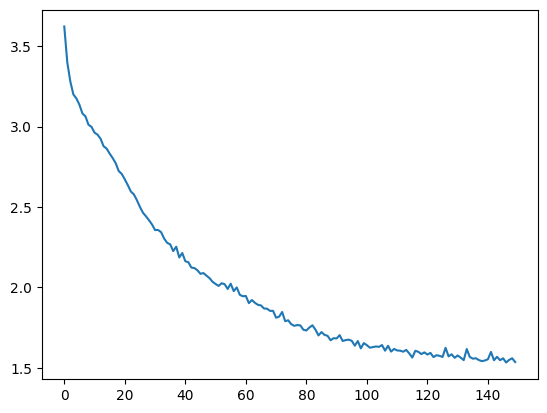

In [ ]:
#Modified Plot
import matplotlib.pyplot as plt
plt.plot(loss_records)

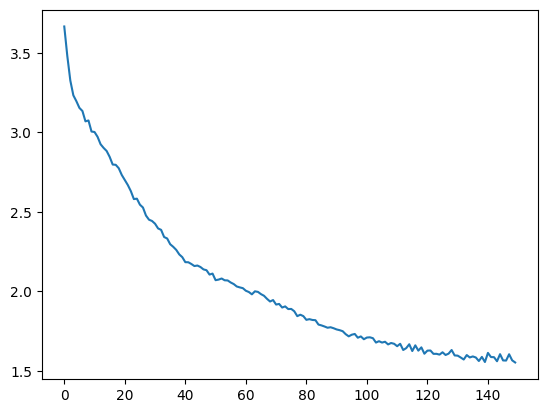

In [ ]:
#Previous Plot
#import matplotlib.pyplot as plt
#plt.plot(loss_records)

In [ ]:
summed_gradients_all = expected_gradients.sum(dim=0)

In [ ]:
summed_gradients_all

tensor([ 1.2288e-03, -4.0638e-01, -1.8742e-03,  2.5764e-04,  4.2644e-03,
        -1.2548e-04, -1.3526e-01,  2.9384e-04,  1.2926e-04,  1.7890e-04,
         4.6175e-04,  8.4609e-04,  4.9329e-04, -7.7540e-04, -8.0256e-04,
         0.0000e+00, -5.3290e-04,  7.1685e-04, -2.7344e-03, -4.5194e-03,
        -1.4743e-03, -1.3987e-03, -8.7955e-04, -7.2946e-04, -4.0964e-03,
        -3.7826e-03, -1.2169e-04,  1.9883e-03,  8.5887e-04,  1.2729e-04,
         3.2690e-04, -2.1105e-03,  9.0442e-04,  2.7104e-06, -9.2861e-03,
        -3.1225e-04,  3.6492e-04, -9.9503e-04, -7.2641e-03, -2.2009e-03,
         6.3323e-04,  1.3080e-03, -7.0719e-04,  6.3374e-05,  7.3886e-04,
         6.3428e-04, -4.9960e-04, -6.6025e-04, -1.4678e-04, -3.5943e-05,
        -2.5496e-03, -3.1697e-04,  1.1653e-03, -3.3420e-02,  7.8512e-05,
        -6.3403e-03, -8.0884e-03, -1.4709e-03,  5.1602e-04,  2.3832e-04,
         9.0413e-04, -2.3401e-04, -1.2921e-04,  3.1058e-04, -3.6199e-03,
         2.3801e-04,  7.7216e-04,  2.9159e-04, -5.6

In [ ]:
avg = torch.mean(summed_gradients_all)

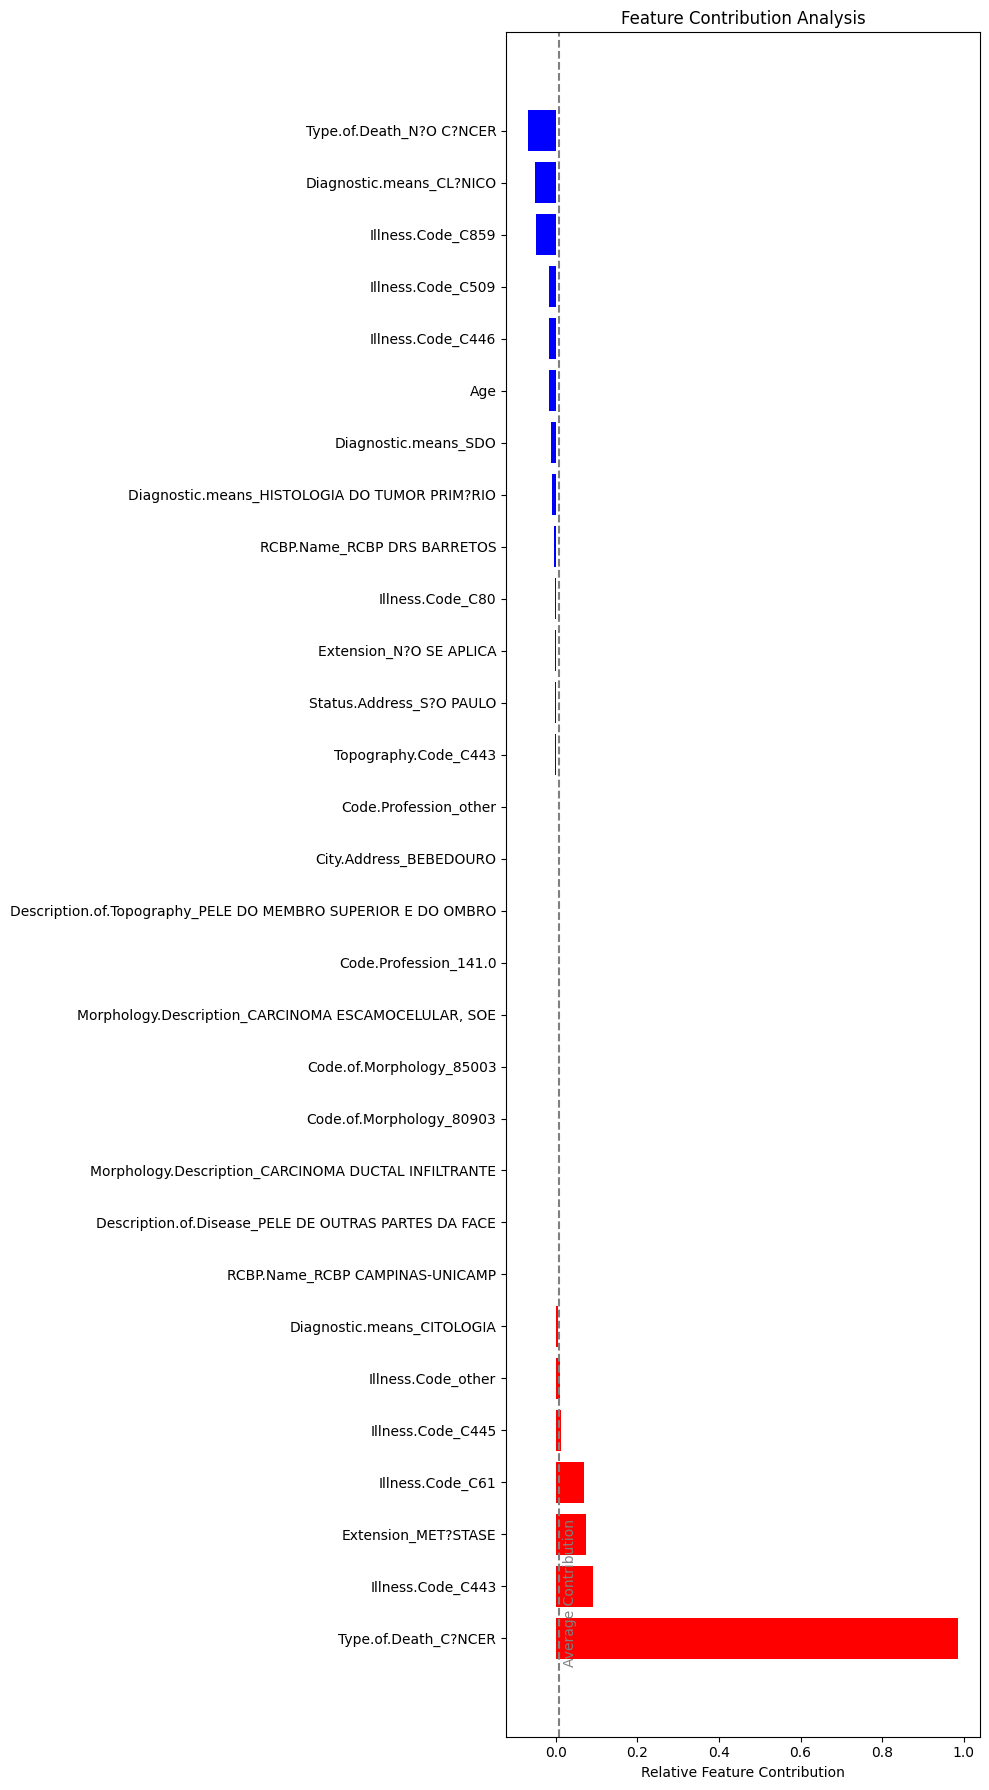

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X.columns.tolist()
# Comment out the hard codded feature_contributions
#feature_contributions = [ 8.2754e-03,  2.4449e-01, -6.7458e-05,  5.4123e-05,  1.5575e-03,
#         3.2035e-04, -3.0248e-02,  3.2682e-03,  2.3505e-04, -2.9171e-03,
#         1.6119e-03,  4.8344e-04, -1.7238e-03, -1.1669e-03,  5.9588e-03,
#         0.0000e+00, -4.1573e-04, -5.4701e-04, -1.0473e-03, -1.4245e-03,
#        -3.0089e-04,  1.1117e-03,  7.6333e-04,  6.3784e-03,  6.1414e-04,
#        -3.7345e-03, -1.4455e-03, -3.2355e-04,  3.3533e-04,  4.6745e-04,
#        -4.3285e-04,  2.5618e-04,  1.8904e-03,  6.8282e-04, -6.9565e-04,
#        -1.4172e-03, -1.2154e-03,  8.1726e-04, -8.3177e-03, -7.5985e-04,
#        -1.1202e-03, -5.8048e-04,  1.0369e-03, -2.8469e-04,  6.7106e-03,
#         3.5879e-04, -4.2590e-05, -4.9208e-04,  7.3213e-04, -1.1677e-03,
#         5.0838e-04,  2.0164e-03, -2.9205e-04, -6.7307e-02,  9.6444e-05,
#         2.8948e-03,  1.5678e-02, -9.4986e-04,  9.6401e-06,  2.4515e-03,
#         6.6200e-04, -1.4110e-03, -1.7674e-03,  3.8453e-04, -1.9134e-03,
#        -5.4385e-04, -4.9116e-04,  6.5076e-04,  3.4984e-04, -9.6108e-04,
#         3.6344e-04,  7.8890e-04, -9.3827e-04,  6.7942e-04,  3.8333e-03,
#         7.4971e-04, -5.2135e-04,  3.9201e-04, -3.5277e-03, -3.6636e-04,
#         4.2249e-04, -1.2218e-03, -1.4330e-03,  2.0466e-03, -3.6416e-03,
#         1.8880e-04, -1.4094e-03, -5.4314e-04,  1.6829e-04,  3.3163e-03,
#        -1.2260e-04,  1.3083e-03,  2.6524e-03,  9.9954e-04, -3.5142e-03,
#         4.8810e-03, -2.5063e-04,  1.2950e-03, -4.9680e-04, -1.6306e-03,
#        -1.6315e-03, -1.3667e-03,  2.1176e-03,  6.0328e-04, -1.1989e-03,
#         2.3749e-03, -2.0358e-03, -2.0848e-03,  4.5019e-04,  1.1912e-03,
#        -1.5323e-03, -7.2216e-04, -4.4424e-04,  1.9066e-03, -3.5590e-03,
#         1.5582e-03, -1.6984e-04, -5.5106e-01,  4.0006e-01, -2.6152e-01,
#        -3.1872e-01,  2.3336e+00,  5.0189e-02,  1.7094e-02, -1.2590e+00,
#        -5.3713e-02, -4.2591e-01, -1.4865e-01, -2.4621e-03,  1.1240e-02,
#        -3.8996e-03, -2.6369e-03, -1.6012e-02,  6.2234e+00,  3.1755e+00,
#         1.2218e+01, -2.3051e-02, -5.5302e-02]



feature_contributions = summed_gradients_all.detach().cpu().tolist()


feature_contributions = feature_contributions / np.sum(feature_contributions)
sorted_indices = np.argsort(feature_contributions)[::-1]
max15_indices = sorted_indices[:15]

min15_indices = sorted_indices[-15:]

selected_indices = np.concatenate([max15_indices, min15_indices])

fig, ax = plt.subplots(figsize=(10, len(selected_indices) * 0.6))
colors = ['red' if val > 0 else 'blue' for val in feature_contributions[selected_indices]]
ax.barh(range(len(selected_indices)), feature_contributions[selected_indices], color=colors)

ax.set_yticks(range(len(selected_indices)))
ax.set_yticklabels(np.array(feature_names)[selected_indices])
ax.set_xlabel("Relative Feature Contribution")

avg_contribution = 1 / len(feature_names)
ax.axvline(avg_contribution, ls='--', color='gray')

ax.text(avg_contribution+0.01, -0.5, 'Average Contribution', color='gray', rotation='vertical')
plt.title("Feature Contribution Analysis")
plt.tight_layout()
plt.show()

## Predictions and Evaluations
- Rewrote the predictions and evaluations

In [ ]:
# Created by Jingyan
model.eval()
test_predictions = []

# Disable gradient calculations
with torch.no_grad():
    for X_test, _, _, _ in test_loader:
        # Forward pass
        X_test = X_test.to(device)
        task_outputs_ = model(X_test)

        # Store the predictions
        test_predictions.append(task_outputs_)

# Process the predictions as needed
# For example, converting them to a list or concatenating
# Here we concatenate the predictions for each task
test_predictions = [torch.cat([preds[i] for preds in test_predictions]) for i in range(len(test_predictions[0]))]



In [ ]:
print(len(test_predictions))
print(test_predictions[0].shape)

7
torch.Size([2048, 1])


In [ ]:
# Created by Jingyan
model.eval()
train_predictions = []

# Disable gradient calculations
with torch.no_grad():
    for X_train, _, _, _ in train_loader:
        # Forward pass
        X_train = X_train.to(device)
        task_outputs_ = model(X_train)

        # Store the predictions
        train_predictions.append(task_outputs_)

# Process the predictions as needed
# For example, converting them to a list or concatenating
# Here we concatenate the predictions for each task
train_predictions = [torch.cat([preds[i] for preds in train_predictions]) for i in range(len(train_predictions[0]))]



In [ ]:
print(len(train_predictions))
print(train_predictions[0].shape)

7
torch.Size([10240, 1])


In [ ]:
# made by Xinyu
def binarize_and_sum_columns(output_list):
    def binarize_list(input_list):
        tensor = torch.Tensor(input_list)
        # print(input_list.max() == input_list.min())
        binary_tensor = (tensor >= 0.5).float()
        return binary_tensor

    result = binarize_list(output_list[0])
    for i in range(1, len(output_list)):
        binary_column = binarize_list(output_list[i])
        print(binary_column.max() == binary_column.min())
        result += binary_column

    return result


In [ ]:
# made by Xinyu
Y_hat_train = binarize_and_sum_columns(train_predictions)
Y_hat_train = Y_hat_train.squeeze()
print(Y_hat_train.shape)

Y_hat_test = binarize_and_sum_columns(test_predictions)
Y_hat_test = Y_hat_test.squeeze()
print(Y_hat_test.shape)

tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
torch.Size([10240])
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
torch.Size([2048])


In [ ]:
# created by Jingyan
# Get the true labels and status
train_trues = []
train_statuses = []
for _, train_targets, train_masks, train_status in train_loader:
    true_label = [train_targets[i]*train_masks[i] for i in range(len(train_targets))]
    train_trues.append(true_label)
    train_statuses.append(train_status)
train_trues = [torch.cat([preds[i] for preds in train_trues]) for i in range(len(train_trues[0]))]
train_statuses = torch.cat([status for status in train_statuses])

print(len(train_trues))
print(train_trues[0].shape)
print(train_statuses.shape)

test_trues = []
test_statuses = []
for _, test_targets, test_masks, test_status in test_loader:
    true_label = [test_targets[i]*test_masks[i] for i in range(len(test_targets))]
    test_trues.append(true_label)
    test_statuses.append(test_status)

test_trues = [torch.cat([preds[i] for preds in test_trues]) for i in range(len(test_trues[0]))]
test_statuses = torch.cat([status for status in test_statuses])

print(len(test_trues))
print(test_trues[0].shape)
print(test_statuses.shape)

7
torch.Size([10240, 1])
torch.Size([10240])
7
torch.Size([2048, 1])
torch.Size([2048])


In [ ]:
# made by Xinyu
Y_true_train = binarize_and_sum_columns(train_trues)
Y_true_train = Y_true_train.squeeze()
print(Y_true_train.shape)

Y_true_test = binarize_and_sum_columns(test_trues)
Y_true_test = Y_true_test.squeeze()
print(Y_true_test.shape)

tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
torch.Size([10240])
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
torch.Size([2048])


In [ ]:
# made by Xinyu
# Modifed by Jingyan: adjusted for cencored data following Dr. Li's code
# https://github.com/yanlirock/Multi-task_Survival_Analysis/blob/6cda8883a240b789ef38be891909a2bae15f4623/functions/getcindex_cox.m#L1

class Cindex(torch.nn.Module):
    def __init__(self):
        super(Cindex, self).__init__()

    def forward(self, y, y_hat, status):
        if not torch.is_tensor(y):
            y = torch.Tensor(y)
        if not torch.is_tensor(y_hat):
            y_hat = torch.Tensor(y_hat)
        if not torch.is_tensor(status):
          status = torch.Tensor(status)

        N = y.size(0)
        total_pairs = 0
        c = 0

        for i in range(N):
            for j in range(i + 1, N):
                a = y[i]
                b = y[j]
                a_hat = y_hat[i]
                b_hat = y_hat[j]
                astatus = status[i]
                bstatus = status[j]
                if (a >= b and a_hat >= b_hat and bstatus == 1) or (a <= b and a_hat <= b_hat and astatus == 1):
                    c += 1
                if (a <= b and astatus==1) or (b <= a and bstatus == 1):
                    total_pairs += 1

        outcome = c / total_pairs
        return outcome

cindex_calculator = Cindex()
c11_train = cindex_calculator(Y_true_train, Y_hat_train, train_statuses)
print(c11_train)
c11_test = cindex_calculator(Y_true_test, Y_hat_test, test_statuses)
print(c11_test)
#According to the way in your paper
# c = 1 / num * Σi=1^num Σj>i [yj > yi * I[S(^yj|Xj) > S(^yi|Xi)]]

In [ ]:
# 0.7103323579075326
# 0.7193680369479399
# 56mins

In [ ]:
# c11_train = 0.8174466628004992
# c11_test = 0.8137755363531064

I have modified the c-index according to Dr. Li's github code, we might not need the following part. (Jingyan)

In [ ]:
# made by Xinyu
# For this Cindex, it seems that
# it does not take the censored data into account,
# should we adjust for censored data?
class Cindex(torch.nn.Module):
    def __init__(self):
        super(Cindex, self).__init__()

    def forward(self, y, y_hat):
        if not torch.is_tensor(y):
            y = torch.Tensor(y)
        if not torch.is_tensor(y_hat):
            y_hat = torch.Tensor(y_hat)

        N = y.size(0)
        total_pairs = N * (N - 1) / 2
        c = 0

        for i in range(N):
            for j in range(i + 1, N):
                a = y[i]
                b = y[j]
                a_hat = y_hat[i]
                b_hat = y_hat[j]

                if (a >= b and a_hat >= b_hat) or (a <= b and a_hat <= b_hat):
                    c += 1

        outcome = c / total_pairs
        return outcome

cindex_calculator = Cindex()
c11_train = cindex_calculator(Y_true_train, Y_hat_train)
c11_test = cindex_calculator(Y_true_test, Y_hat_test)

#According to the way in your paper
# c = 1 / num * Σi=1^num Σj>i [yj > yi * I[S(^yj|Xj) > S(^yi|Xi)]]

In [ ]:
print(c11_train)
print(c11_test)

In [ ]:
class Cindex(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y, y_hat, status):

        status_matrix = status.repeat(status.size(0), 1)
        cmp_mask = (y.repeat(status.size(0), 1) - y) * (status_matrix - status_matrix.t())
        concordant = torch.where(
            (y_hat.repeat(status.size(0), 1) - y_hat) * cmp_mask > 0,
            torch.ones_like(cmp_mask), torch.zeros_like(cmp_mask))

        total_pairs = torch.where(
            cmp_mask !=0,
            torch.ones_like(cmp_mask), torch.zeros_like(cmp_mask))

        return concordant.sum() / total_pairs.sum()

In [ ]:
cindex_calculator = Cindex()
c11_train = cindex_calculator(Y_true_train, Y_hat_train, train_statuses)

In [ ]:
c11_train

In [ ]:
Y_test_train = Y_true_train.cuda(0)
Y_hat_train = Y_hat_train.cuda(0)
train_statuses = train_statuses.cuda(0)